<a href="https://colab.research.google.com/github/amalayil23/G8_DSA_Final/blob/main/DSA_Final_G8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run below before starting to get 'data.csv'

In [1]:
!git clone https://github.com/amalayil23/G8_DSA_Final

Cloning into 'G8_DSA_Final'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), done.


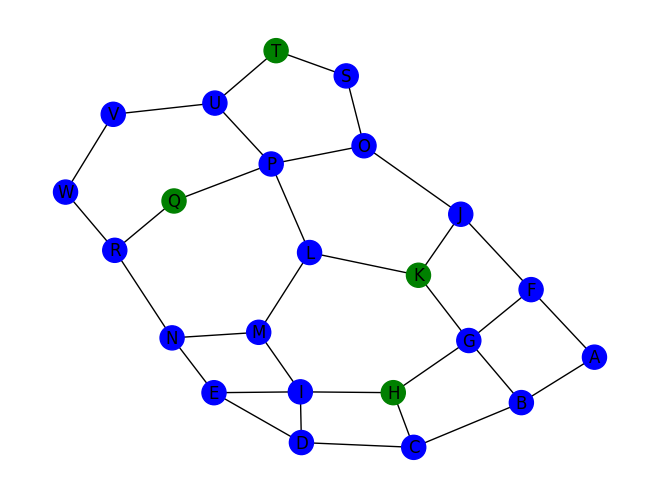

In [3]:
#TASK 1
#################################################################
import pandas as pd
import networkx as nx

# Read CSV file
df = pd.read_csv("/content/G8_DSA_Final/data.csv")

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
nodes = list("ABCDEFGHIJKLMNOPQRSTUVW")
charging_stations = ['H', 'K', 'Q', 'T']

for node in nodes:
    G.add_node(node)

# Add edges to the graph
for _, row in df.iterrows():
    G.add_edge(row['NodeS'], row['NodeD '], weight=row['Distance'])

# Specify node colors
node_colors = ['green' if node in charging_stations else 'blue' for node in G.nodes()]

# Draw the graph with specified node colors
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()





In [4]:
#TASK 2
#################################################################
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start] = 0
    visited = set()

    while len(visited) < len(graph.nodes()):
        current_node = min((node for node in graph.nodes() if node not in visited), key=lambda node: distances[node])
        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_distance = distances[current_node] + graph[current_node][neighbor]['weight']
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance

    return distances

# Example usage:
starting_node = 'A'
shortest_paths = {charging_station: dijkstra(G, starting_node)[charging_station] for charging_station in charging_stations}

for i in shortest_paths:
  print("Shortest Path from A to {} is {} \n".format(i,shortest_paths[i]))


Shortest Path from A to H is 16 

Shortest Path from A to K is 17 

Shortest Path from A to Q is 39 

Shortest Path from A to T is 37 



In [5]:
#TASK 3
#################################################################
def recommend_route(shortest_paths):
    return min(shortest_paths, key=shortest_paths.get)

# Example usage:
recommended_station = recommend_route(shortest_paths)
print("Recommended charging station:", recommended_station)
print("Shortest distance:", shortest_paths[recommended_station])


Recommended charging station: H
Shortest distance: 16
